# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression


In [2]:
df_renda = pd.read_csv('Profissao- Cientista de Dados_M10_support material.csv')

#retirando coluna unnamed:0
df_renda = df_renda.drop(columns=['Unnamed: 0'])

df_renda.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


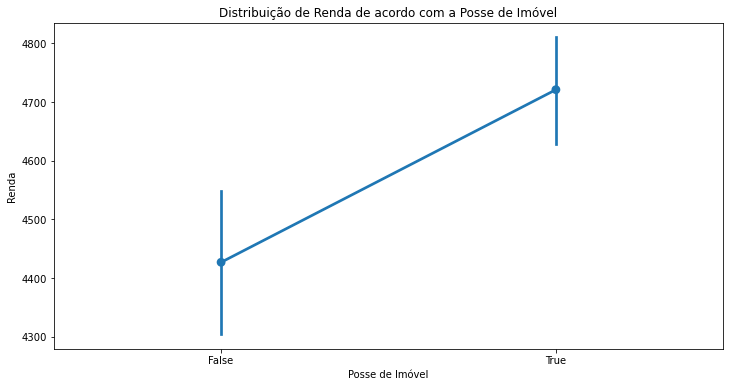

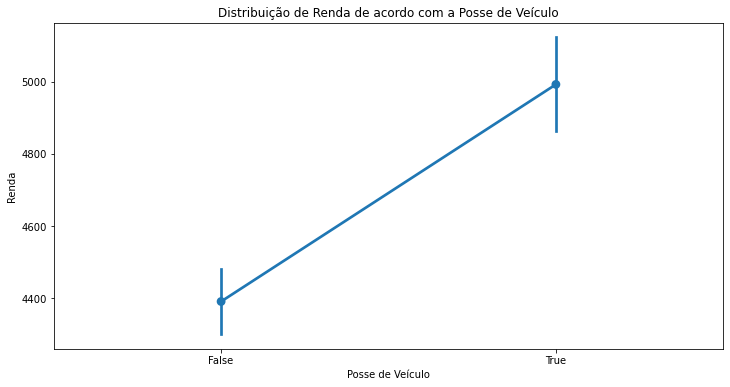

In [3]:
# Pointplot para posse_de_imovel
plt.figure(figsize=(12, 6))
sns.pointplot(x='posse_de_imovel', y='renda', data=df_renda)
plt.title('Distribuição de Renda de acordo com a Posse de Imóvel')
plt.xlabel('Posse de Imóvel')
plt.ylabel('Renda')
plt.show()

# Pointplot para posse_de_veiculo
plt.figure(figsize=(12, 6))
sns.pointplot(x='posse_de_veiculo', y='renda', data=df_renda)
plt.title('Distribuição de Renda de acordo com a Posse de Veículo')
plt.xlabel('Posse de Veículo')
plt.ylabel('Renda')
plt.show()


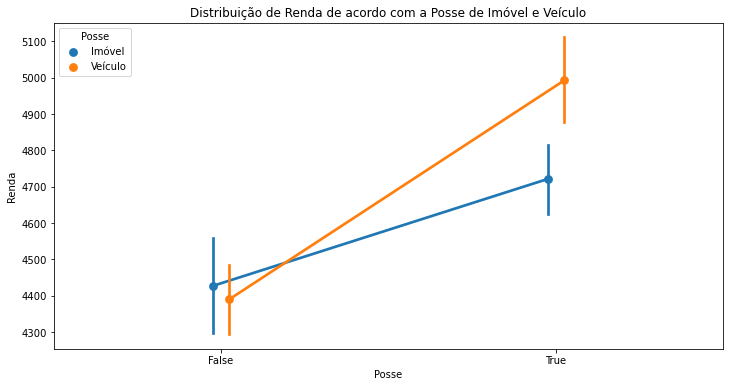

In [4]:
# Para visualizar os 2 simultâneamente, vamos criar um dataframe auxiliar para ficar mais fácil a manipulação dos dados e separá-los por tipo de posse
df_renda['tipo_posse'] = 'Imóvel'
df_renda['posse_valor'] = df_renda['posse_de_imovel']
df_renda_veiculo = df_renda.copy()
df_renda_veiculo['tipo_posse'] = 'Veículo'
df_renda_veiculo['posse_valor'] = df_renda_veiculo['posse_de_veiculo']

df_renda_combinado = pd.concat([df_renda, df_renda_veiculo])

# Plotando o gráfico com ambas as informações
plt.figure(figsize=(12, 6))
sns.pointplot(x='posse_valor', y='renda', hue='tipo_posse', data=df_renda_combinado, dodge=True)
plt.title('Distribuição de Renda de acordo com a Posse de Imóvel e Veículo')
plt.xlabel('Posse')
plt.ylabel('Renda')
plt.legend(title='Posse', loc='upper left')
plt.show()

Podemos ver pelos gráficos anteriores que ambas as variáveis possuem diferenças na sua relação com a variável 'renda'. No entanto, a que mostra uma diferença maior é a variável 'posse_de_veiculo', sendo ela, portanto, a que seria melhor para discriminar a 'renda' de forma significante.